In [1]:
import os, shutil
from os.path import join
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
mydata_source ='C:/Users/Admin/Documents/Neural_Networks/PetImages'
base_dir ='C:/Users/Admin/Documents/Neural_Networks/cats_and_dogs'
os.mkdir(base_dir)


In [3]:
train_dir =os.path.join(base_dir,'train')
os.mkdir(train_dir)

In [4]:
test_dir =os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
validation_dir =os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [6]:
train_cats_dir =os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [7]:
train_dogs_dir =os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [8]:
test_cats_dir =os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [9]:
test_dogs_dir =os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [10]:
validation_cats_dir =os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

In [11]:
validation_dogs_dir =os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [12]:
fnames =['{}.jpg'.format(i) for i in range(1000)]
try:
    for fname in fnames:
        src =os.path.join(mydata_source, fname)
        dst =os.path.join(base_dir, fname)
        shutil.copyfile(src, dst)
except FileNotFoundError:
    print('Can not locate the file',fname)

Can not locate the file 0.jpg


In [13]:
print('total training Cat images:', len(os.listdir(train_cats_dir)),'and the total training Dog images is',len(os.listdir(train_dogs_dir)))

total training Cat images: 1000 and the total training Dog images is 1000


In [14]:
print('Total testing Cat images is ',len(os.listdir(test_cats_dir)),'and total testing Dog images is',len(os.listdir(test_dogs_dir)))

Total testing Cat images is  500 and total testing Dog images is 500


In [15]:
print('The total validation dog images is', len(os.listdir(validation_dogs_dir)),' and the total validation cat images is',len(os.listdir(validation_cats_dir)))

The total validation dog images is 500  and the total validation cat images is 500


In [16]:
from keras import layers
from keras import models

In [17]:
model =models.Sequential()

In [18]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

# Compilation of my network

In [20]:
model.compile(optimizer='RMSprop',
             loss='binary_crossentropy', metrics =['accuracy'])

# Using the ImageDataGenerator() class to read the files

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_data_generated =ImageDataGenerator(rescale =1./255)
test_data_generated =ImageDataGenerator(rescale = 1./255)

# Resize all the images into pixels into 150 x 150

In [22]:
train_data_gene =train_data_generated.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator =test_data_generated.flow_from_directory(validation_dir, 
                                                             target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
for batch, latch in train_data_gene:
    print('The batch is',batch.shape)
    print('The batch is',latch.shape)
    break

The batch is (20, 150, 150, 3)
The batch is (20,)


# fitting our model using the fit_generator() method which is like the fit() method

In [26]:
history =model.fit_generator(train_data_gene, steps_per_epoch=100, epochs =20, 
                           validation_data=validation_generator, validation_steps=50)

Epoch 1/20
100/100 [==============================] - 78s 780ms/step - loss: 0.7551 - accuracy: 0.5190 - val_loss: 0.6871 - val_accuracy: 0.6040
Epoch 2/20
100/100 [==============================] - 62s 619ms/step - loss: 0.6862 - accuracy: 0.5765 - val_loss: 0.6875 - val_accuracy: 0.6170
Epoch 3/20
100/100 [==============================] - 62s 619ms/step - loss: 0.6605 - accuracy: 0.6575 - val_loss: 0.6083 - val_accuracy: 0.6530
Epoch 4/20
100/100 [==============================] - 63s 627ms/step - loss: 0.5803 - accuracy: 0.7050 - val_loss: 0.7403 - val_accuracy: 0.7030
Epoch 5/20
100/100 [==============================] - 61s 613ms/step - loss: 0.5086 - accuracy: 0.7545 - val_loss: 0.8075 - val_accuracy: 0.6940
Epoch 6/20
100/100 [==============================] - 64s 635ms/step - loss: 0.4603 - accuracy: 0.7885 - val_loss: 0.6012 - val_accuracy: 0.7160
Epoch 7/20
100/100 [==============================] - 64s 645ms/step - loss: 0.3940 - accuracy: 0.8145 - val_loss: 0.3589 - val_ac

# Saving my model

In [27]:
model.save('cats_and_dogs1.h5')

# Let's plot the loss and accuracy of the model over the training and  validation data

In [28]:
history_dict =history.history

In [29]:
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [30]:
train_loss =history_dict['loss']
train_accuracy =history_dict['accuracy']

validation_accuracy =history_dict['val_accuracy']
validation_loss =history_dict['val_loss']
#epochs = range(1, len(acc) + 1)


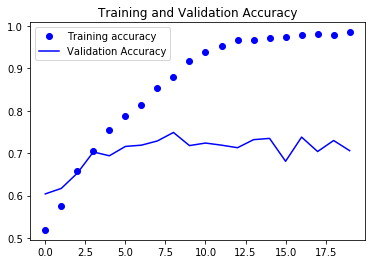

In [31]:
plt.title('Training and Validation Accuracy')
plt.plot( train_accuracy,'bo', label='Training accuracy')
plt.plot( validation_accuracy, 'b', label='Validation Accuracy')
plt.legend()

Text(0.5, 1.0, 'Training Accuracy and Validation Accuracy')

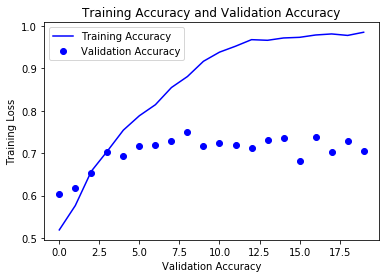

In [34]:
plt.plot(train_accuracy,'b', label='Training Accuracy')
plt.plot(validation_accuracy, 'bo', label='Validation Accuracy')
plt.legend()
plt.xlabel('Validation Accuracy')
plt.ylabel('Training Loss')
plt.title('Training Accuracy and Validation Accuracy')

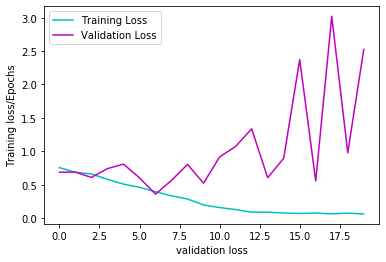

In [40]:
plt.plot(train_loss, 'c', label='Training Loss')
plt.plot(validation_loss, 'm', label='Validation Loss')
plt.xlabel('validation loss')
plt.ylabel('Training loss/Epochs')
plt.legend()


# We need to work on the overfitting of the model using the data augmentation techniques

In [42]:
data_gene =ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True,
                             fill_mode='nearest')

In [43]:
from keras.preprocessing import image

In [46]:
fnames =[os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path =fnames[3]

In [47]:
img_path

'C:/Users/Admin/Documents/Neural_Networks/cats_and_dogs\\train\\cats\\100.jpg'

In [48]:
imagess =image.load_img(img_path, target_size=(150,150)) #we need to rescale the image to 150 by 150 RGB pixels gride

In [49]:
x =image.img_to_array(imagess) # we convert the image into array of shape (150, 150, 3)

In [50]:
x =x.reshape((1,) + x.shape) # we need to rshape it into (1,150, 150, 3) shape

# Need to generate random data so i initialise a variable and loop it for data augmenting

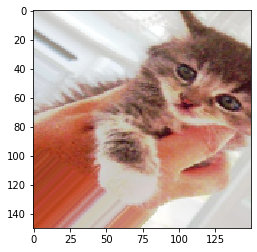

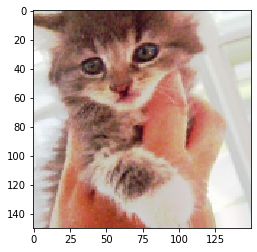

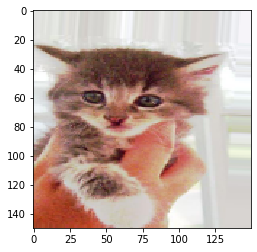

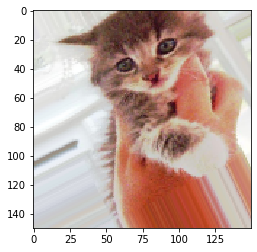

In [55]:
i =0
for batch in data_gene.flow(x, batch_size =1):
    plt.figure(i)
    plot_image =plt.imshow(image.array_to_img(batch[0]))
    i =i +1
    if i % 4 ==0:
        break
    plt.show()

# we add the dropout before we add the dense layer so we can help reduce overfitting our model

In [56]:
from keras import models
from keras import layers

In [58]:
model =models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# We do our model compilation here

In [65]:
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

# We train our network here with our augmentation and dropout

In [68]:
train_data_generated =ImageDataGenerator(rescale =1./255,
                                        rotation_range=40,
                                         width_shift_range=0.2,
                                         height_shift_range =0.2,
                                         shear_range =0.2,
                                         zoom_range=0.2, horizontal_flip =True
                                        )
test_data_generated =ImageDataGenerator(rescale=1./255) # We do not need to augemt the validation data

# We set our directoris for the training and validation data source

In [69]:
train_data_gene =train_data_generated.flow_from_directory(train_dir, target_size =(150, 150),
                                                         batch_size =512, class_mode='binary')
validation_data_gene=test_data_generated.flow_from_directory(validation_dir, target_size=(150, 150), batch_size =32, 
                                                             class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# we then train our network here with 100 epochs. Lol, I'm using cpu so it will definetely take some 15 to 20 minutes 

In [ ]:
mynetwork =model.fit_generator(train_data_gene, steps_per_epoch =20, epochs=20, validation_data=validation_data_gene,
                               validation_steps =50)

In [ ]:
model.save(cats_and_dogs_2.h5)

In [ ]:
history_dict =mynetwork.history

In [ ]:
history_dict.keys()

In [ ]:
train_loss =history_dict['loss']
train_accuracy =history_dict['accuracy']

validation_accuracy =history_dict['val_accuracy']
validation_loss =history_dict['val_loss']

In [ ]:
plt.title('Training and Validation Accuracy')
plt.plot( train_accuracy,'bo', label='Training accuracy')
plt.plot( validation_accuracy, 'b', label='Validation Accuracy')
plt.legend()

In [ ]:
plt.plot(train_accuracy,'b', label='Training Accuracy')
plt.plot(validation_accuracy, 'bo', label='Validation Accuracy')
plt.legend()
plt.xlabel('Validation Accuracy')
plt.ylabel('Training Loss')
plt.title('Training Accuracy and Validation Accuracy')

In [ ]:
plt.plot(train_loss, 'c', label='Training Loss')
plt.plot(validation_loss, 'm', label='Validation Loss')
plt.xlabel('validation loss')
plt.ylabel('Training loss/Epochs')
plt.legend()